## Calculate gradient

In [13]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import ndimage
import cv2 as cv
import pandas as pd

### Open image

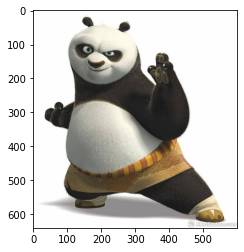

(600, 640)


In [3]:
og_im = Image.open('panda.png')
plt.imshow(og_im)
plt.show()
print(og_im.size)

### Transform original image to Grayscale

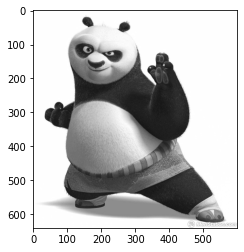

In [4]:
og_img = mpimg.imread('panda.png')
R, G, B = og_img[:, :, 0], og_img[:, :, 1], og_img[:, :, 2]
gray_img = 0.2989 * R + 0.587 * G + 0.114 * B
plt.imshow(gray_img, cmap='gray')
plt.show()

### Sobel filter

In [5]:
Gx = np.array([[1.0, 0.0, -1.0], [2.0, 0.0, -2.0], [1.0, 0.0, -1.0]])
Gy = np.array([[1.0, 2.0, 1.0], [0.0, 0.0, 0.0], [-1.0, -2.0, -1.0]])
[rows, columns] = np.shape(gray_img)
sobel_filtered_image = np.zeros(shape=(rows, columns))

In [6]:
for i in range(rows - 2):
    for j in range(columns - 2):
        gx = np.sum(np.multiply(Gx, gray_img[i:i + 3, j:j + 3]))
        gy = np.sum(np.multiply(Gy, gray_img[i:i + 3, j:j + 3]))
        sobel_filtered_image[i + 1, j + 1] = np.sqrt(np.square(gx) + np.square(gy))

/tmp/ipykernel_37854/2132520804.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig2.show()


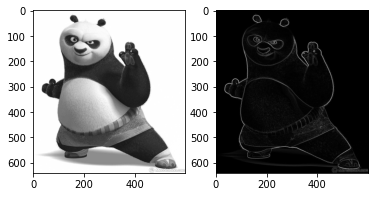

In [8]:
fig2 = plt.figure(2)
ax1, ax2 = fig2.add_subplot(121), fig2.add_subplot(122)
ax1.imshow(gray_img, cmap='gray')
ax2.imshow(sobel_filtered_image, cmap=plt.get_cmap('gray'))
fig2.show()

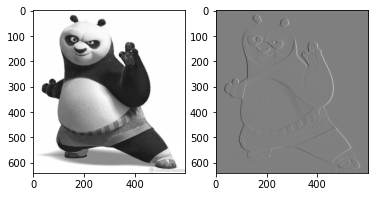

In [9]:
fig = plt.figure()
plt.gray()  # show the filtered result in grayscale
ax1 = fig.add_subplot(121)  # left side
ax2 = fig.add_subplot(122)  # right side
result = ndimage.sobel(gray_img)
ax1.imshow(gray_img)
ax2.imshow(result)
plt.show()

### Prewitt filter

In [10]:
Gx = np.array([[1.0 ,1.0, 1.0], [0.0, 0.0, 0.0], [-1.0, -1.0, -1.0]])
Gy = np.array([[-1.0, 0.0, 1.0], [-1.0, 0.0, 1.0], [-1.0, 0.0, 1.0]])
[rows, columns] = np.shape(gray_img)
prewitt_filtered_image = np.zeros(shape=(rows, columns))

In [11]:
for i in range(rows - 2):
    for j in range(columns - 2):
        gx = np.sum(np.multiply(Gx, gray_img[i:i + 3, j:j + 3]))
        gy = np.sum(np.multiply(Gy, gray_img[i:i + 3, j:j + 3]))
        prewitt_filtered_image[i + 1, j + 1] = np.sqrt(np.square(gx) + np.square(gy))

/tmp/ipykernel_37854/281776762.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig2.show()


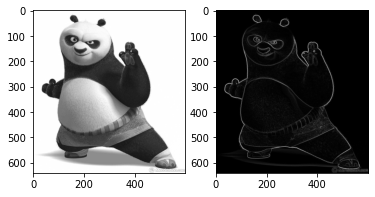

In [12]:
fig2 = plt.figure(2)
ax1, ax2 = fig2.add_subplot(121), fig2.add_subplot(122)
ax1.imshow(gray_img, cmap='gray')
ax2.imshow(prewitt_filtered_image, cmap=plt.get_cmap('gray'))
fig2.show()

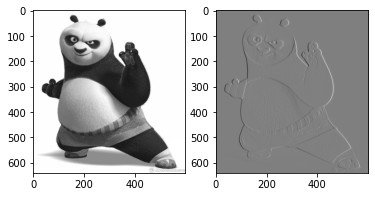

In [16]:
fig = plt.figure()
plt.gray()  # show the filtered result in grayscale
ax1 = fig.add_subplot(121)  # left side
ax2 = fig.add_subplot(122)  # right side
result = ndimage.prewitt(gray_img)
ax1.imshow(gray_img)
ax2.imshow(result)
plt.show()

### Scharr filter

In [17]:
Gx = np.array([[-3.0 ,0.0, 3.0], [-10.0, 0.0, 10.0], [-3.0 ,0.0, 3.0]])
Gy = np.array([[3.0, 10.0, 3.0], [0.0, 0.0, 0.0], [-3.0, -10.0, -3.0]])
[rows, columns] = np.shape(gray_img)
scharr_filtered_image = np.zeros(shape=(rows, columns))

In [18]:
for i in range(rows - 2):
    for j in range(columns - 2):
        gx = np.sum(np.multiply(Gx, gray_img[i:i + 3, j:j + 3]))
        gy = np.sum(np.multiply(Gy, gray_img[i:i + 3, j:j + 3]))
        scharr_filtered_image[i + 1, j + 1] = np.sqrt(np.square(gx) + np.square(gy))

/tmp/ipykernel_46495/1562267825.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig2.show()


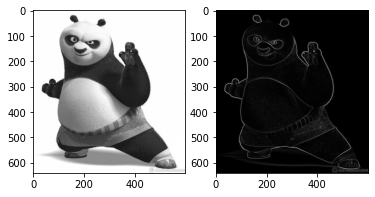

In [19]:
fig2 = plt.figure(2)
ax1, ax2 = fig2.add_subplot(121), fig2.add_subplot(122)
ax1.imshow(gray_img, cmap='gray')
ax2.imshow(scharr_filtered_image, cmap=plt.get_cmap('gray'))
fig2.show()

In [25]:
sobelx = cv.Scharr(gray_img, cv.CV_64F, 1, 0, )
sobely = cv.Scharr(gray_img, cv.CV_64F, 0, 1, )


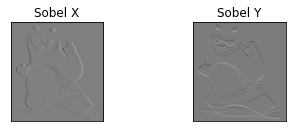

In [27]:
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.show()